# Case Analysis Overview

## Brooklyn Housing Analysis

In [1]:
from __future__ import division
import os
import csv
import pickle
import json
import datetime
import io
import geopandas as gpd
import pandas as pd
import numpy as np
import time as tm
import sys
import string
import re

from scipy.special import erf
from datetime import datetime
from collections import Counter
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile
from urllib.request import urlopen

import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
%matplotlib notebook

# Graph Analysis:
### Write the step-by-step instructions for completing the Graph Analysis and provide findings

In [2]:
os.getcwd()

'/Users/Cindy/Desktop/Data Science Portfolio/DS Python/DS Python Code'

#### Step 1: Load data into a dataframe

In [4]:
housing_data = pd.read_csv('/Users/Cindy/Desktop/Data Science Portfolio/DS Python/DS Python Data files/brooklyn_sales_map.csv', low_memory=False)
df = pd.read_csv('/Users/Cindy/Desktop/Data Science Portfolio/DS Python/DS Python Data files/NYCBuildingPermitsIssued.csv', low_memory=False)

#### Step 2: Check the dimension of the table and view the data

In [5]:
print("The dimension of the table is: ", housing_data.shape)
housing_data.head(5)

The dimension of the table is:  (390883, 111)


,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,...,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,...,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.147631


**Preview the first 5 rows of the data**

In [6]:
df.head(5) 

,permit_type,permit_status,house_number,street_name,zipcode,borough,issuance_date,expiration_date,job_start_date,job_type,...,permit_type_definition,permit_sequence_number,filing_date_unparsed,issuance_date_unparsed,expiration_date_unparsed,job_start_date_unparsed,act_as_superintendent_unparsed,superintendent_first_and_last_name,non_profit_unparsed,dobrundate_unparsed
0,EW,ISSUED,4311,13TH AVENUE,11219.0,BROOKLYN,2008-09-16T00:00:00,2008-10-23T00:00:00,2008-09-16T00:00:00,A2,...,Equipment Work,1,09/16/2008 12:00:00 AM,09/16/2008 12:00:00 AM,10/23/2008 12:00:00 AM,09/16/2008 12:00:00 AM,NaN,NaN,N,11/03/2017 12:00:00 AM
1,EW,ISSUED,35,WEST 131 STREET,10037.0,MANHATTAN,2008-09-16T00:00:00,2009-09-14T00:00:00,2004-07-09T00:00:00,A2,...,Equipment Work,6,09/15/2008 12:00:00 AM,09/16/2008 12:00:00 AM,09/14/2009 12:00:00 AM,07/09/2004 12:00:00 AM,NaN,NaN,Y,11/03/2017 12:00:00 AM
2,NB,ISSUED,176-56,133RD AVE.,11434.0,QUEENS,2008-09-16T00:00:00,2009-02-01T00:00:00,2008-09-16T00:00:00,NB,...,New Building,1,09/16/2008 12:00:00 AM,09/16/2008 12:00:00 AM,02/01/2009 12:00:00 AM,09/16/2008 12:00:00 AM,NaN,JOHN OLOWNIA,N,11/03/2017 12:00:00 AM
3,PL,ISSUED,302,WEST 79TH STREET,10024.0,MANHATTAN,2008-09-16T00:00:00,2009-09-16T00:00:00,2008-09-16T00:00:00,A2,...,Plumbing,1,09/16/2008 12:00:00 AM,09/16/2008 12:00:00 AM,09/16/2009 12:00:00 AM,09/16/2008 12:00:00 AM,NaN,NaN,N,11/03/2017 12:00:00 AM
4,EW,ISSUED,1140,6 AVENUE,10036.0,MANHATTAN,2008-09-16T00:00:00,2009-06-30T00:00:00,2008-09-16T00:00:00,A2,...,Equipment Work,1,09/16/2008 12:00:00 AM,09/16/2008 12:00:00 AM,06/30/2009 12:00:00 AM,09/16/2008 12:00:00 AM,NaN,NaN,N,11/03/2017 12:00:00 AM


**Return rows with 'issued' permit status**

In [7]:
df = df[df['permit_status'] == 'ISSUED'] 

**Format date to perform datetime functions**

In [8]:
df['issuance_date'] = pd.to_datetime(df['issuance_date'], format='%Y-%m-%d') 

**Counting values by year using datetime function**

In [9]:
df['issuance_date'].dt.year.value_counts() 

2017.0    193534
2016.0    188854
2015.0    180404
2014.0    168818
2018.0    167699
2013.0    159141
2007.0    155548
2006.0    152893
2008.0    148435
2005.0    147385
2012.0    146589
2011.0    142488
2004.0    135382
2010.0    134592
2009.0    134315
2003.0    120195
2002.0    109781
2019.0    106857
2001.0    103215
2000.0     98719
1999.0     89674
1998.0     80866
1997.0     71321
1996.0     65322
1995.0     61670
1994.0     59758
1993.0     56702
1992.0     51426
1991.0     44578
1990.0     22981
1989.0      2969
Name: issuance_date, dtype: int64

Calulate the percent change of permits issued over the years

In [10]:
df['issuance_date'].dt.year.value_counts().sort_index().pct_change() 

1989.0         NaN
1990.0    6.740317
1991.0    0.939776
1992.0    0.153618
1993.0    0.102594
1994.0    0.053896
1995.0    0.031996
1996.0    0.059218
1997.0    0.091837
1998.0    0.133832
1999.0    0.108921
2000.0    0.100865
2001.0    0.045543
2002.0    0.063615
2003.0    0.094862
2004.0    0.126353
2005.0    0.088660
2006.0    0.037372
2007.0    0.017365
2008.0   -0.045729
2009.0   -0.095126
2010.0    0.002062
2011.0    0.058666
2012.0    0.028781
2013.0    0.085627
2014.0    0.060808
2015.0    0.068630
2016.0    0.046839
2017.0    0.024781
2018.0   -0.133491
2019.0   -0.362805
Name: issuance_date, dtype: float64

**Sorting index so data is in order by year and then plotting the permit data**

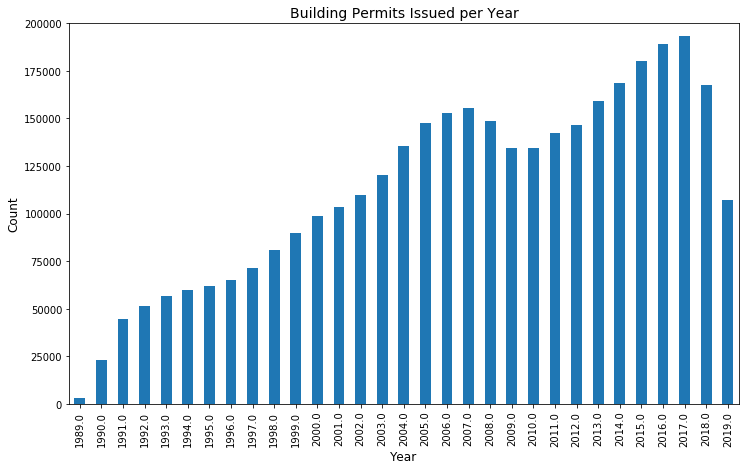

In [11]:
fig = plt.figure(figsize=(12,7))
df['issuance_date'].dt.year.value_counts().sort_index().plot(kind='bar')

plt.title('Building Permits Issued per Year', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Count', size=12)
plt.ylim(0,200000)
plt.xticks(rotation='90')
plt.show()

**Return all data where the year does not equal 2017**

In [12]:
df = df[df['issuance_date'].dt.year != 2017] 

In [13]:
df['permit_type'].value_counts().sort_values(ascending=False)

EW    1470307
PL     668399
EQ     501865
AL     295230
NB     214138
SG      71026
DM      48179
FO      39453
Name: permit_type, dtype: int64

Changing the names to make them more readable. Use map function to set new values.

In [14]:
df['permit_type'] = df['permit_type'].map({'EW': 'Equipment Work', 'PL': 'Plumbing',
                                            'EQ': 'Construction Equipment', 'AL': 'Alteration',
                                            'NB': 'New Building', 'FO': 'Foundation',
                                            'SG': 'Sign', 'DM': 'Demolition'}) 

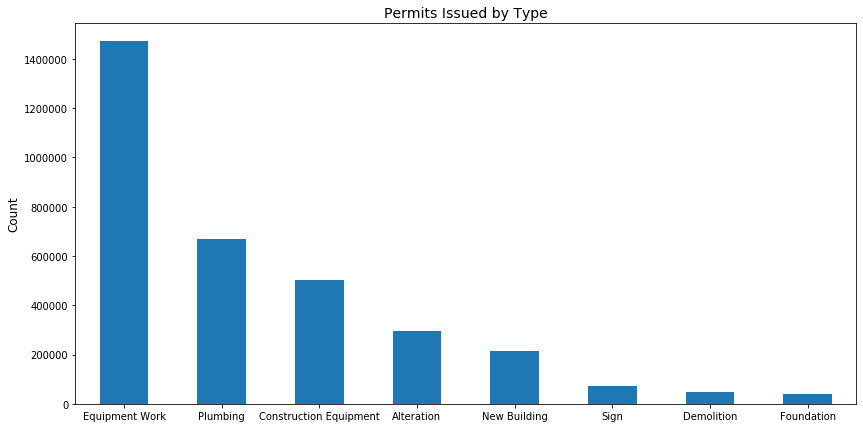

In [15]:
fig = plt.figure(figsize=(14,7))

df['permit_type'].value_counts().plot(kind='bar')

plt.title('Permits Issued by Type', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

Where were most building permits issued between 2013-2016?

**Counting the # of permits by borough**

In [16]:
df['borough'].value_counts() 

MANHATTAN        1385441
BROOKLYN          761664
QUEENS            687466
BRONX             280257
STATEN ISLAND     193770
Name: borough, dtype: int64

**Plotting the Building Permits Issued by Borough**

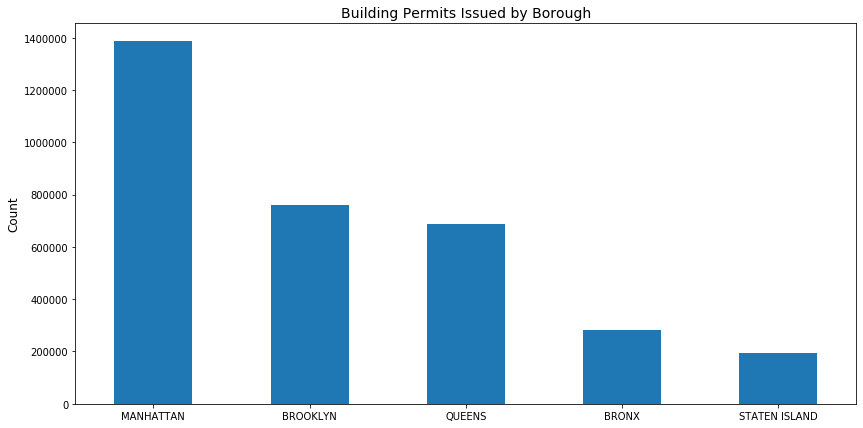

In [17]:
fig = plt.figure(figsize=(14,7))
df['borough'].value_counts().plot(kind='bar')

plt.title('Building Permits Issued by Borough', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

What percentage of the total permits have been issued for Manhattan? Brooklyn?

**Dividing the number of Manhattan records by the entire data set**

In [18]:
len(df[df['borough'] == 'MANHATTAN']) / len(df) 

0.41873959906885033

**Dividing the number of Brooklyn records by the entire data set**

In [19]:
len(df[df['borough'] == 'BROOKLYN']) / len(df) 

0.23020747760834046

What percentage of borough permits are for residential projects?

In [20]:
boroughs = ['BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND', 'BRONX'] #list of borough names to pass to for loop

for i in boroughs:
    """
    this for loop returns the percentage of residential permits
    within each borough

    count the number of residential permits then divide by the
    total number of borough permits
    """
    print ('\n' + i)
    print (df[df['borough'] == i]['residential'].value_counts() / len(df[df['borough'] == i]))


BROOKLYN
Series([], Name: residential, dtype: float64)

MANHATTAN
Series([], Name: residential, dtype: float64)

QUEENS
Series([], Name: residential, dtype: float64)

STATEN ISLAND
Series([], Name: residential, dtype: float64)

BRONX
Series([], Name: residential, dtype: float64)


**Looks like Manhattan is the only borough to issue more permits for commercial projects than residential!**

How many permits have been issued by zip code?
Now we are going count the number of permits by zipcode then sorting them

In [21]:
df['zipcode'].value_counts().sort_index().head(5) 

0.0           24
4452.0         4
10000.0      174
10001.0    53063
10002.0    33468
Name: zipcode, dtype: int64

**We will bring back only zip codes that are greater or equal to 10,000**

In [22]:
df = df[df['zipcode'] >= 10000] 

Review the five zip codes with most permits issued

In [23]:
df['zipcode'].value_counts().sort_values(ascending=False).head(5) 

10022.0    85751
10019.0    70904
10013.0    63039
10011.0    61821
10003.0    60759
Name: zipcode, dtype: int64

It is helpful to know the 5 zip codes with the most permits issues but it doesn’t tell me where they are in the city. Let’s map the data to get an idea of where these are located, through visual inspection.

In [24]:
zip_codes = gpd.read_file('/Users/Cindy/Desktop/AAE STUFF/550/brooklynhomes2003to2017/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zip_codes['zip_code'] = zip_codes['ZIPCODE'].astype(int)
zip_codes.dtypes

ZIPCODE         object
BLDGZIP         object
PO_NAME         object
POPULATION     float64
AREA           float64
STATE           object
COUNTY          object
ST_FIPS         object
CTY_FIPS        object
URL             object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
zip_code         int64
dtype: object

In [25]:
counts = zip_codes['zip_code'].value_counts()
counts = counts.to_frame(name='count')
counts = counts.reset_index()

In [26]:
counts = gpd.GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip_code'))

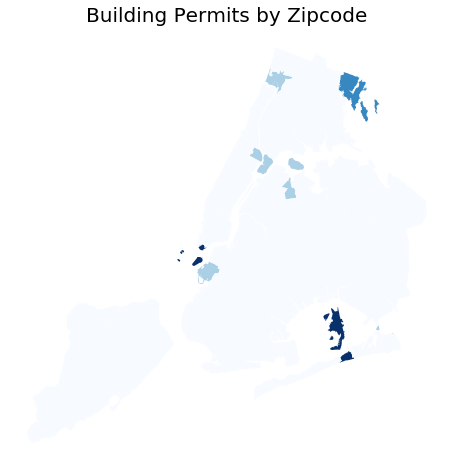

In [27]:
fig, ax = plt.subplots(figsize = (8,8))

counts.plot(column='count', cmap='Blues',alpha=1,linewidth=0.1, ax=ax)

plt.title('Building Permits by Zipcode', size=20)
plt.axis('off')
plt.show()

The heatmap is darker in areas with more permits issued, and lighter in areas with fewer permits issued.

Conclusion

Between the years 2013-2016, the New York City Department of Buildings issued over 600,000 building permits, where 44% of them were for work in the borough of Manhattan. There was a 51% spike in the number of building permits issued from the year 2013 to 2014, which seems to be pretty significant. In further exploration, one might dig a bit deeper to find out why there was such an increase between those years.

The New York City neighborhood Midtown East (zip code 10022) had the greatest number of permits issued between 2013- 2016. Midtown East is the home of the famous 5th Avenue shopping district, St. Patrick’s Cathedral, and a host of other attractions. Considering the area generates a ton of traffic from tourists, shoppers, and workers alike, it is unsurprising that a high volume construction work is done to maintain the area and continue to drive the NYC economy. Such construction could have also been in anticipation of the new MTA yellow line train, the Q train, which runs along 2nd avenue on the east side and opened in January 2017.

Visualizing the building permits issued by zipcode provides better context for where permits have been issued. Merging the building data with a shape file allows you to display the density of building permits issued and locate the hotspots. For someone unfamiliar with zip codes in New York, the visual representation provides clues to spatial positioning. For example, one can see that the darkest spot is right beneath Central Park, which is more informative than simply identifying the darkest spot as zip code 10022.



#### Step 3: What type of variables are in the table

In [28]:
print("Describe Data")
print(housing_data.describe())
print("Summarized Data")
print(housing_data.describe(include=['O']))

# this will return the datatypes of the columns
housing_data.dtypes

Describe Data
          Unnamed: 0   borough          block            lot  easement  \
count  390883.000000  390883.0  390883.000000  390883.000000       0.0   
mean   195442.000000       3.0    4275.651169     272.509986       NaN   
std    112838.346973       0.0    2642.765332     484.658837       NaN   
min         1.000000       3.0       1.000000       1.000000       NaN   
25%     97721.500000       3.0    1786.000000      21.000000       NaN   
50%    195442.000000       3.0    4305.000000      45.000000       NaN   
75%    293162.500000       3.0    6585.000000      94.000000       NaN   
max    390883.000000       3.0    8955.000000    9133.000000       NaN   

            zip_code  residential_units  commercial_units    total_units  \
count  390883.000000      390883.000000     390883.000000  390883.000000   
mean    11208.429087           2.486138          0.174142       2.673227   
std       361.207836          48.200178          1.653362      48.233343   
min         0.0

Unnamed: 0                   int64
borough                      int64
neighborhood                object
building_class_category     object
tax_class                   object
                            ...   
PFIRM15_FL                 float64
Version                     object
MAPPLUTO_F                 float64
SHAPE_Leng                 float64
SHAPE_Area                 float64
Length: 111, dtype: object

In [29]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 111 entries, Unnamed: 0 to SHAPE_Area
dtypes: float64(64), int64(11), object(36)
memory usage: 331.0+ MB


In [30]:
print(len(housing_data))

390883


In [31]:
housing_data.columns

Index(['Unnamed: 0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class', 'block', 'lot', 'easement', 'building_class', 'address',
       ...
       'EDesigNum', 'APPBBL', 'APPDate', 'PLUTOMapID', 'FIRM07_FLA',
       'PFIRM15_FL', 'Version', 'MAPPLUTO_F', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object', length=111)

#### Step 4: Create scatter plot, histogram and bar chart to display and identify outliers

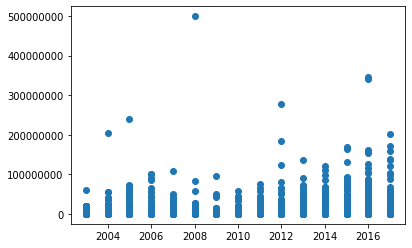

In [32]:
plt.scatter(x=housing_data['year_of_sale'],y=housing_data['sale_price'])
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()

In [33]:
bins=[-100000000,20000,40000,60000,80000,100000,1000000,10000000,500000000]
choices =['$0-$200k','$200k-$400k','$400k-$600k','$600k-$800k','$800k-$1mlln','$1mlln-$10mlln','$10mlln-$100mlln','$100mlln-$500mlln']
housing_data['price_range']=pd.cut(housing_data['sale_price'],bins=bins,labels=choices)

**Is or are there outliers present? If so, should they be removed from dataset and why?**

In [34]:
housing_data.sort_values('sale_price').tail(1)


,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,price_range
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100mlln-$500mlln


In [35]:
housing_data['sale_price'].describe().apply(lambda x: format(x, 'f'))

count       390883.000000
mean        506754.477693
std        2353964.664220
min              0.000000
25%              0.000000
50%         275000.000000
75%         593000.000000
max      499401179.000000
Name: sale_price, dtype: object

In [36]:
housing_data = housing_data[housing_data.sale_price > 0]

In [37]:
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)
  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df
housing_data = remove_outlier(housing_data,"sale_price")

#### Step 5: Data preparation, clean data by removing puctuation etc.

In [38]:
housing_data = housing_data.drop(['APPBBL','BoroCode','Borough','BBL','price_range','PLUTOMapID','YearBuilt','CondoNo','BuiltFAR','FireComp','MAPPLUTO_F','Sanborn','SanitBoro','Unnamed: 0','Version', 'block','borough','Address','OwnerName','zip_code'],axis=1)


In [39]:
housing_data = housing_data.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'iufc' else x.fillna(x.mode()[0]))


In [40]:
housing_data['Age of House at Sale'] = housing_data['year_of_sale'] - housing_data['year_built']
housing_data = housing_data.drop(['year_of_sale','year_built'],axis=1)

#### Step 6: Provide a summary of statistics analysis

In [41]:
housing_data['sale_price'].describe().apply(lambda x: format(x, 'f'))

count     231108.000000
mean      503518.978659
std       304128.424828
min            1.000000
25%       285000.000000
50%       465000.000000
75%       675000.000000
max      1437306.000000
Name: sale_price, dtype: object

In [42]:
#change strings to ints ( categorical to numerical )
def strnums(cols):
  return dict(zip(set(housing_data[cols]),list(range(0,len(set(housing_data[cols]))))))
for columns in set(housing_data.select_dtypes(exclude='number')):
  housing_data[columns] = housing_data[columns].map(strnums(columns))

#### Provide stacked bar visualization of sale prices in pricing ranges by year 

In [43]:
bins=[-100000000,20000,40000,60000,80000,100000,1000000,10000000,500000000]
choices =['$0-$200k','$200k-$400k','$400k-$600k','$600k-$800k','$800k-$1mlln','$1mlln-$10mlln','$10mlln-$100mlln','$100mlln-$500mlln']
housing_data['price_range']=pd.cut(housing_data['sale_price'],bins=bins,labels=choices)

#### created a function and utilised list comprehension to convert sales data of each year into percentages.

In [44]:
def conv(year):
  return housing_data[housing_data['year_of_sale']==year].groupby('price_range').size()
perc_total = [x/sum(x)*100 for x in [conv(2003),conv(2004),conv(2005),conv(2006),conv(2007),conv(2008),conv(2009),conv(2010),conv(2011),conv(2012),conv(2013),conv(2014),conv(2015),conv(2016),conv(2017)]]
year_names = list(range(2003,2018))
housing_df = pd.DataFrame(perc_total, index= year_names)

KeyError: 'year_of_sale'

#### Step 8: Pearson Ranking

In [46]:
from bokeh.io import output_file, curdoc
from bokeh.plotting import figure, show, ColumnDataSource, reset_output
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColorBar, Select, HoverTool, GeoJSONDataSource
from bokeh.palettes import RdYlGn
from bokeh.transform import linear_cmap, log_cmap
from bokeh.models.widgets import Slider, Tabs, Panel
from bokeh.layouts import row, column, gridplot, widgetbox

fig = figure()

f = open("mappingdf.pkl", 'rb')
df = pickle.load(f)
f.close

reset_output()

def display_data(selectedYear):
    yr = selectedYear
    df_yr = df[df['year_of_sale'] == yr]
    df_yr = df_yr[df_yr['sale_price'] >= 100000]
    return df_yr

source = ColumnDataSource(data = display_data(2017))

pal= RdYlGn[6]

mapper = log_cmap(field_name = "sale_price", palette = pal, low=100000, low_color = 'green', high=23000000)


tooltips = [("Price","@sale_price"), ("Address","@address"), ("Neighborhood", "@neighborhood")]
slider = Slider(start=2003, end=2017, step=1, value=2017, title = 'Year')
fig = figure(x_axis_type = 'mercator', y_axis_type = 'mercator', tooltips = tooltips, title = 'Brooklyn Residential Housing Prices, 2017')
fig.add_tile(CARTODBPOSITRON)

fig.circle(x = 'coords_x', y = 'coords_y', line_color = mapper,color=mapper, source=source)

color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0,0))

fig.add_layout(color_bar, 'right')
layout = column(fig, slider)

def update_plot(attr, old, new):
    yr = slider.value
    new_data = display_data(yr)
    source = new_data
    fig.title.text = 'Brooklyn Housing Prices, %d' %yr

# Make a slider object: slider
slider = Slider(title = 'Year',start = 2003, end = 2017, step = 1, value = 2017)
slider.on_change('value', update_plot)
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(fig, widgetbox(slider))
curdoc().add_root(layout)
curdoc().title='Brooklyn Housing Prices'

#Display plot
show(layout)

FileNotFoundError: [Errno 2] No such file or directory: 'mappingdf.pkl'